# EDA and ML Insights on Youtube Trending Dataset

<h1 style="font-family:COMIC SANS ;text-align:left;background-color:salmon"><b><u>IMPORTING PACKAGES</u></b></h1>

In [52]:
import numpy as np   
import pandas as pd  
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import json
warnings.filterwarnings('ignore') # To supress warnings
sns.set(style="darkgrid") # set the background for the graphs
pd.set_option('display.float_format', lambda x: '%.3f' % x)

from collections import Counter
import datetime
import wordcloud


<h1 style="font-family:COMIC SANS ;text-align:left;background-color:salmon"><b><u>📖 READING DATA 📖</u></b></h1>

In [53]:
#Reading Dataset of trends in india
path_india='../input/youtube-trending-video-dataset/IN_youtube_trending_data.csv'
df_india = pd.read_csv(path_india)
#df_inda.loc[publishedAt]


<h1 style="font-family:COMIC SANS ;text-align:left;background-color:salmon"><b><u>👀  EXPLORING DATASET 👀 </u></b></h1>

<div class ="alert alert-block alert-info">
<font size=4><b><i> We start with inspecting the dataset and record observations:</i></b></font><br>
     1.Check the correctness the dataset ?.<br> 
     2.Check for attributes/columns,check if headers are clean<br>
     3.Number of rows and columns in data set (Dimension of dataset) <br>
     4.What are the data types of the data, and how many columns are numeric?<br>
     5.Are the datatype correct ?

In [54]:
#This function returns the first 5 rows for the dataset
df_india.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-12T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899,224925,3979409,350210,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
1,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11T09:00:11Z,UCm9SZAl03Rev9sFwloCdz1g,Rehaan Records,10,2020-08-12T00:00:00Z,[None],11308046,655450,33242,405146,https://i.ytimg.com/vi/x-KbnJ9fvJc/default.jpg,False,False,Singer/Lyrics: Karan Aujla Feat Tania Music/ D...
2,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11T07:30:02Z,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10,2020-08-12T00:00:00Z,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296533,6179,30058,https://i.ytimg.com/vi/KX06ksuS6Xo/default.jpg,False,False,CLASH official music video performed by DILJIT...
3,UsMRgnTcchY,Dil Ko Maine Di Kasam Video | Amaal M Ft.Ariji...,2020-08-10T05:30:49Z,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,10,2020-08-12T00:00:00Z,hindi songs|2020 hindi songs|2020 new songs|t-...,23564512,743931,84162,136942,https://i.ytimg.com/vi/UsMRgnTcchY/default.jpg,False,False,Gulshan Kumar and T-Series presents Bhushan Ku...
4,WNSEXJJhKTU,"Baarish (Official Video) Payal Dev,Stebin Ben ...",2020-08-11T05:30:13Z,UCye6Oz0mg46S362LwARGVcA,VYRLOriginals,10,2020-08-12T00:00:00Z,VYRL Original|Mohsin Khan|Shivangi Joshi|Payal...,6783649,268817,8798,22984,https://i.ytimg.com/vi/WNSEXJJhKTU/default.jpg,False,False,VYRL Originals brings to you ‘Baarish’ - the b...


In [55]:
#displays last 5 rows
df_india.tail()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
128322,wTnfAbSl2gs,TRYING LIFE HACKS NON STOP WITH MY BROTHER & S...,2022-06-07T12:43:21Z,UCaqULAbiq-6ZRlKmx0Uv_Cw,Rimorav Vlogs,24,2022-06-10T00:00:00Z,Rimorav|Rimorav vlogs|TRYING LIFE HACKS NON ST...,1962076,177263,0,4919,https://i.ytimg.com/vi/wTnfAbSl2gs/default.jpg,False,False,Watch TRYING LIFE HACKS NON STOP WITH MY BROTH...
128323,Fn9bnOhnvN4,Samsung S22 Ultra 100X Zoom-ന്റെ രഹസ്യം #short...,2022-06-05T12:46:46Z,UCCya-YUszMuiTAR3lfYMuog,Mr Perfect Tech,28,2022-06-10T00:00:00Z,[None],867786,99585,0,190,https://i.ytimg.com/vi/Fn9bnOhnvN4/default.jpg,False,False,NaN
128324,RdQgAKe-2wU,"₹1000 के Board से लेकर ₹8,000 Crores की Compan...",2022-06-08T16:16:02Z,UCiGyWN6DEbnj2alu7iapuKQ,Physics Wallah - Alakh Pandey,27,2022-06-10T00:00:00Z,Physics wallah|Physics wallah alakh Pandey|phy...,816676,81949,0,5113,https://i.ytimg.com/vi/RdQgAKe-2wU/default.jpg,False,False,Original Video Link - https://youtu.be/tUod9xE...
128325,729IHXFhpyo,Eruma Saani | Il Thaka Saiya | EP - 4 | 2022 T...,2022-06-05T14:37:07Z,UCPyFYlqbkxkWX_dWCg0eekA,Eruma Saani,23,2022-06-10T00:00:00Z,Eruma Saani|Tamil Comedy Videos|Films|Movies|H...,1058706,70372,0,2267,https://i.ytimg.com/vi/729IHXFhpyo/default.jpg,False,False,Download RummyCircle App Now and Get upto ₹ 20...
128326,kwlGsNyr5e8,Watch till the end (Bewafa) 😎🔥 #shorts #bewafa,2022-06-01T03:51:36Z,UC5apxzE3aEOpvP0XkeuW8mw,Bobby chourasiya,22,2022-06-10T00:00:00Z,[None],40325705,3593687,0,6831,https://i.ytimg.com/vi/kwlGsNyr5e8/default.jpg,False,False,NaN


In [56]:

print ("Rows     : " , df_india.shape[0]) #Displays numbers of rows .
print ("Columns  : " , df_india.shape[1]) # and column our dataset contains.
print ("\nFeatures : \n", df_india.columns.tolist())#displays column names
print ("\nMissing values :  ", df_india.isnull().sum().values.sum())   #find missing values
print ("\nUnique values :  \n", df_india.nunique())  # Count distinct observations

Rows     :  128327
Columns  :  16

Features : 
 ['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle', 'categoryId', 'trending_date', 'tags', 'view_count', 'likes', 'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'description']

Missing values :   10117

Unique values :  
 video_id              37875
title                 38376
publishedAt           37502
channelId              3437
channelTitle           3540
categoryId               15
trending_date           652
tags                  24483
view_count           125581
likes                 90561
dislikes              17039
comment_count         25370
thumbnail_link        37876
comments_disabled         2
ratings_disabled          2
description           33174
dtype: int64


<div class ="alert alert-block alert-info">🦉<b>Observations</b>🦉<br>
 ✔There are 128127 rows and 16 columns in  the dataset<br>
 ✔Qualitative Variables are title,channelId,channelTitle,categoryId are most important attributes for our analysis<br>
 ✔Quantitative Variables are PublishedAt,trending_date,view_count,likes,
    dislikes,comment_count<br>
</div>

In [57]:
# Displays columns and datatype .
df_india.dtypes

video_id             object
title                object
publishedAt          object
channelId            object
channelTitle         object
categoryId            int64
trending_date        object
tags                 object
view_count            int64
likes                 int64
dislikes              int64
comment_count         int64
thumbnail_link       object
comments_disabled      bool
ratings_disabled       bool
description          object
dtype: object

In [58]:
#This method prints information about a dataset including the index dtype and columns,
#non-null values and memory usage.
df_india.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128327 entries, 0 to 128326
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           128327 non-null  object
 1   title              128327 non-null  object
 2   publishedAt        128327 non-null  object
 3   channelId          128327 non-null  object
 4   channelTitle       128326 non-null  object
 5   categoryId         128327 non-null  int64 
 6   trending_date      128327 non-null  object
 7   tags               128327 non-null  object
 8   view_count         128327 non-null  int64 
 9   likes              128327 non-null  int64 
 10  dislikes           128327 non-null  int64 
 11  comment_count      128327 non-null  int64 
 12  thumbnail_link     128327 non-null  object
 13  comments_disabled  128327 non-null  bool  
 14  ratings_disabled   128327 non-null  bool  
 15  description        118211 non-null  object
dtypes: bool(2), int64(5)

<h1 style="font-family:COMIC SANS ;text-align:left;background-color:salmon"><b> CLEANING THE DATASET</b></h1>

# Dealing with Missing Values

In [59]:
df_india.isna().sum()

video_id                 0
title                    0
publishedAt              0
channelId                0
channelTitle             1
categoryId               0
trending_date            0
tags                     0
view_count               0
likes                    0
dislikes                 0
comment_count            0
thumbnail_link           0
comments_disabled        0
ratings_disabled         0
description          10116
dtype: int64

<div class ="alert alert-block alert-info">🦉<b>Observations</b>🦉<br>
✔In India dataset , description is missing from 10076 observations and channeltitle is missing only 1 obeservation.


In [60]:
# Since description is missing from alot of videos, we can replace it with an empty string
df_india.description.fillna('',inplace=True) 
df_india.dropna(axis=0,inplace=True)
df_india.isna().sum()

video_id             0
title                0
publishedAt          0
channelId            0
channelTitle         0
categoryId           0
trending_date        0
tags                 0
view_count           0
likes                0
dislikes             0
comment_count        0
thumbnail_link       0
comments_disabled    0
ratings_disabled     0
description          0
dtype: int64

# Getting category from the category file

In [61]:

#we need id and title from this file which are under items tag and snippet contain title
# with open("../input/youtube-trending-video-dataset/IN_category_id.json") as f:
#     categories = json.load(f)["items"]
# cat_dict = {}
# category=[]
# for cat in categories:
#     category.append([cat["id"],cat["snippet"]["title"]])
with open("../input/youtube-trending-video-dataset/IN_category_id.json") as f:
    categories = json.load(f)["items"]

cat_dict = {}

for cat in categories:
    cat_dict[int(cat["id"])] = cat["snippet"]["title"]
    
df_india['category_name'] = df_india['categoryId'].map(cat_dict)

In [137]:
df_india.head(5)

,title,publishedAt,channelTitle,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,category_name,publishing_day,publishing_hour
0,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,FoxStarHindi,2020-08-12T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899,224925,3979409,350210,False,False,Three Streams. Three Stories. One Journey. Sta...,Entertainment,Wed,9
1,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11T09:00:11Z,Rehaan Records,2020-08-12T00:00:00Z,[None],11308046,655450,33242,405146,False,False,Singer/Lyrics: Karan Aujla Feat Tania Music/ D...,Music,Tue,14
2,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11T07:30:02Z,Diljit Dosanjh,2020-08-12T00:00:00Z,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296533,6179,30058,False,False,CLASH official music video performed by DILJIT...,Music,Tue,12
3,Dil Ko Maine Di Kasam Video | Amaal M Ft.Ariji...,2020-08-10T05:30:49Z,T-Series,2020-08-12T00:00:00Z,hindi songs|2020 hindi songs|2020 new songs|t-...,23564512,743931,84162,136942,False,False,Gulshan Kumar and T-Series presents Bhushan Ku...,Music,Mon,10
4,"Baarish (Official Video) Payal Dev,Stebin Ben ...",2020-08-11T05:30:13Z,VYRLOriginals,2020-08-12T00:00:00Z,VYRL Original|Mohsin Khan|Shivangi Joshi|Payal...,6783649,268817,8798,22984,False,False,VYRL Originals brings to you ‘Baarish’ - the b...,Music,Tue,10


In [63]:
df_india.isna().sum()

video_id              0
title                 0
publishedAt           0
channelId             0
channelTitle          0
categoryId            0
trending_date         0
tags                  0
view_count            0
likes                 0
dislikes              0
comment_count         0
thumbnail_link        0
comments_disabled     0
ratings_disabled      0
description           0
category_name        66
dtype: int64

In [64]:
# drop rows containing null value for category_name
df_india.dropna(axis=0,inplace=True)

In [65]:
df_india.isna().sum()

video_id             0
title                0
publishedAt          0
channelId            0
channelTitle         0
categoryId           0
trending_date        0
tags                 0
view_count           0
likes                0
dislikes             0
comment_count        0
thumbnail_link       0
comments_disabled    0
ratings_disabled     0
description          0
category_name        0
dtype: int64

In [66]:
df_india.shape

(128260, 17)

## Removing columns which are not needed for analysis

In [67]:
df_india.drop(['video_id','channelId','categoryId','thumbnail_link'],axis=1,inplace=True)
df_india.head(5)
df_india.shape

(128260, 13)

In [68]:
df_india.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128260 entries, 0 to 128326
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   title              128260 non-null  object
 1   publishedAt        128260 non-null  object
 2   channelTitle       128260 non-null  object
 3   trending_date      128260 non-null  object
 4   tags               128260 non-null  object
 5   view_count         128260 non-null  int64 
 6   likes              128260 non-null  int64 
 7   dislikes           128260 non-null  int64 
 8   comment_count      128260 non-null  int64 
 9   comments_disabled  128260 non-null  bool  
 10  ratings_disabled   128260 non-null  bool  
 11  description        128260 non-null  object
 12  category_name      128260 non-null  object
dtypes: bool(2), int64(4), object(7)
memory usage: 12.0+ MB


<h1 style="font-family:COMIC SANS ;text-align:left;background-color:salmon"><b>📄 Exploratory Data Analysis📄</b></h1>

## Descriptive Statistics

In [69]:
#displays only numeric variables
df_india.describe()

,view_count,likes,dislikes,comment_count
count,128260.000,128260.000,128260.000,128260.000
mean,3105523.233,164043.743,4570.669,10688.964
std,7630938.204,444873.604,100725.806,90591.669
min,0.000,0.000,0.000,0.000
25%,443003.000,16636.000,0.000,481.000
50%,1066422.500,47426.500,680.000,1510.000
75%,2696199.750,135954.250,2486.000,5083.000
max,264407389.000,16115240.000,12341474.000,6738565.000


In [70]:
# displays all varaibles
df_india.describe(exclude='number')

,title,publishedAt,channelTitle,trending_date,tags,comments_disabled,ratings_disabled,description,category_name
count,128260,128260,128260,128260,128260,128260,128260,128260,128260
unique,38358,37485,3536,652,24474,2,2,33157,14
top,#shorts #strugglejeet,2021-06-04T18:15:01Z,Vijay Television,2021-03-02T00:00:00Z,[None],False,False,,Entertainment
freq,41,20,1670,398,22434,127175,127187,10116,50108


In [71]:
df_india.publishedAt.min()

'2020-07-23T11:30:37Z'

In [72]:
df_india.publishedAt.max()

'2022-06-10T07:06:09Z'

<div class ="alert alert-block alert-info">🦉<b>Observations</b>🦉<br>
 ✔The dataset contains observation of videos published from 23 August 2020 to 24 April 2021.<br>
 ✔ There are 14 different categories in dataset <br>
 ✔ Categoryid 24 has maximum number of rows.<br>
  ✔There are 13887 unique video

# Which is the most watched video?

In [73]:
# find the video which has maximum view count.
df_india[df_india['view_count'].isin([df_india.view_count.max()])]

,title,publishedAt,channelTitle,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,category_name
52057,BTS (방탄소년단) 'Butter' Official MV,2021-05-21T03:46:13Z,HYBE LABELS,2021-05-30T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,264407389,16021542,150990,6738565,False,False,BTS (방탄소년단) 'Butter' Official MV Credits: Dire...,Music


# Which are the top 10 most watched trending videos?

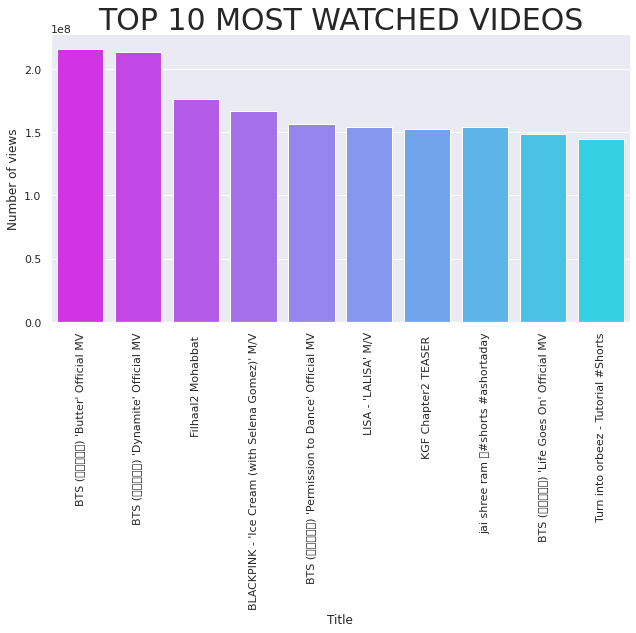

In [148]:
# get top 30 most watched videos
top30viewed=df_india.sort_values(by=['view_count'],ascending=False).head(40)
# we just want the first string from the title and title is pipe separated
top30viewed.title=top30viewed.title.str.split(pat='|').apply(lambda x: x[0])
#top30viewed.reset_index()
sns.catplot(data=top30viewed, x='title', y='view_count',kind='bar',palette='cool_r' ,ci=None, legend_out=False,aspect =2)

plt.ylabel('Number of views')
plt.xlabel('Title')
plt.title('TOP 10 MOST WATCHED VIDEOS',fontsize=30)
plt.xticks(rotation=90)
plt.show()

## <a name="corr"></a>Correlation between dataset variables
Now let's see how the dataset variables are [correlated](https://www.mathsisfun.com/data/correlation.html) with each other: for example, we would like to see how views and likes are correlated, meaning do views and likes increase and decrease together (positive correlation)? Does one of them increase when the other decrease and vice versa (negative correlation)? Or are they not correlated?

Correlation is represented as a value between `-1` and `+1` where `+1` denotes the highest positive correlation, `-1` denotes the highest negative correlation, and `0` denotes that there is no correlation.

Let's see the correlation table between our dataset variables (numerical and boolean variables only)

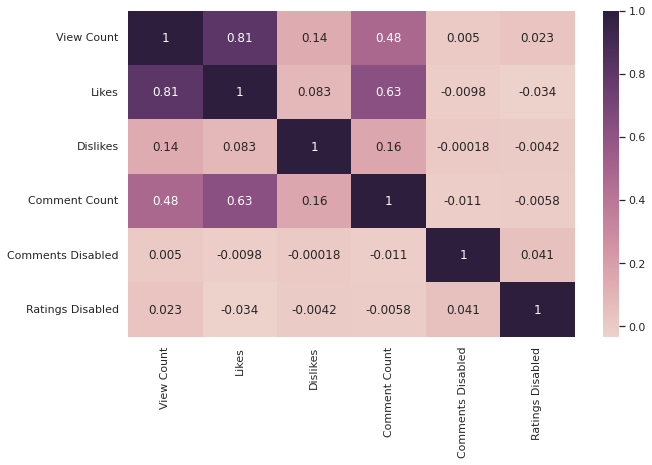

In [75]:
h_labels = [x.replace('_', ' ').title() for x in 
            list(df_india.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(df_india.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

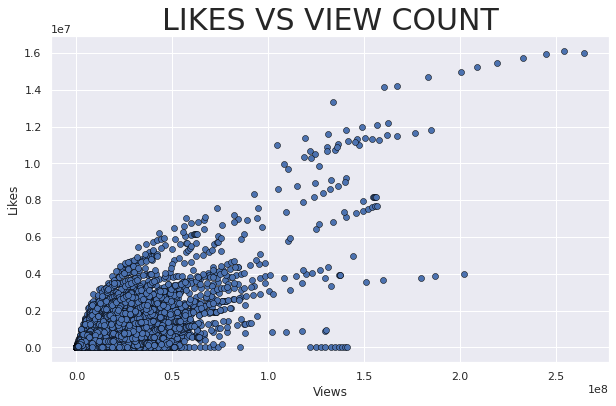

In [147]:
fig, ax = plt.subplots(figsize=(10,6))
_ = plt.scatter(x=df_india['view_count'], y=df_india['likes'], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Likes")
_ = plt.title('LIKES VS VIEW COUNT',fontsize=30)

## <a name="commti"></a>Most common words in video titles
Let's see if there are some words that are used significantly in trending video titles. We will display the `25` most common words in all trending video titles

In [77]:
title_words = list(df_india["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(25)

[('|', 173364),
 ('-', 32574),
 ('||', 20757),
 ('2021', 10492),
 ('#shorts', 10447),
 ('&', 8625),
 ('Song', 6770),
 ('Episode', 6662),
 ('New', 6480),
 ('2', 5776),
 ('The', 5531),
 ('Punjabi', 5422),
 ('2020', 5361),
 ('Video', 5274),
 ('Songs', 5027),
 ('Official', 4879),
 ('in', 4625),
 ('Latest', 4517),
 ('to', 4262),
 ('Promo', 4043),
 ('Video)', 3694),
 ('TV', 3611),
 ('Ka', 3554),
 ('I', 3547),
 ('Media', 3185)]

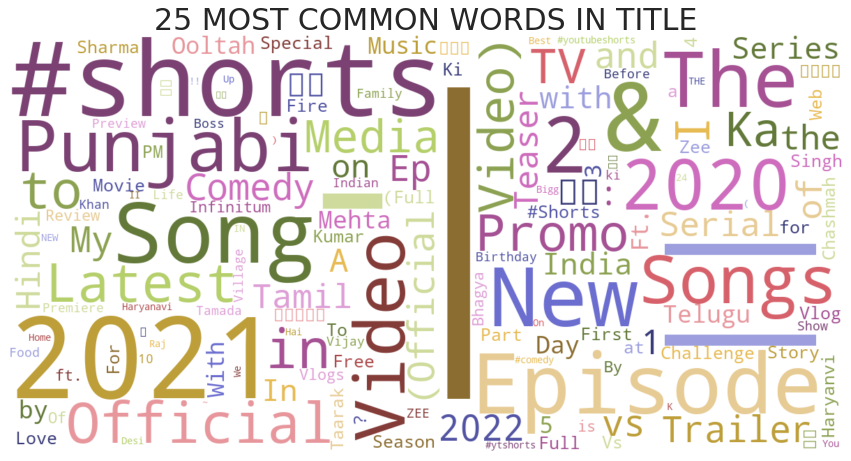

In [146]:
wc = wordcloud.WordCloud(width=1200, height=600, collocations=False, stopwords=None, background_color="white", colormap="tab20b").generate_from_frequencies(dict(Counter(title_words).most_common(150)))
# wc = wordcloud.WordCloud(width=1200, height=500, 
#                          collocations=False, background_color="white", 
#                          colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")
_ = plt.title('25 MOST COMMON WORDS IN TITLE',fontsize=30)

## <a name="chan"></a>Which channels have the largest number of trending videos?

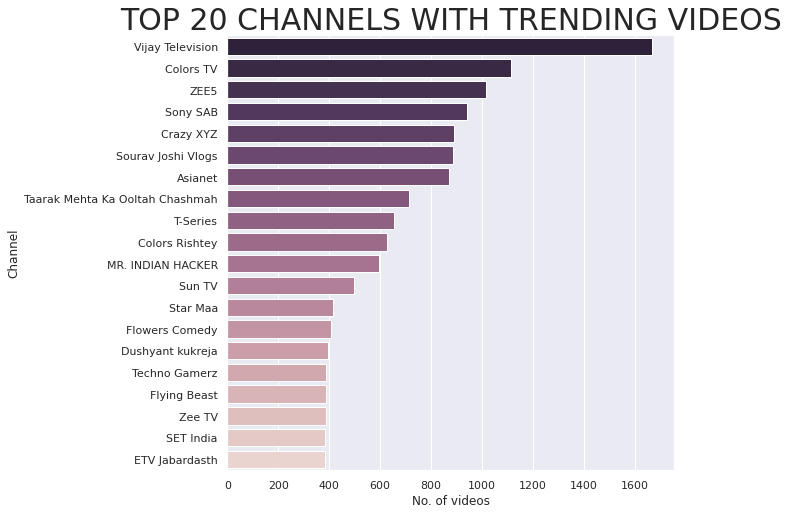

In [149]:
cdf = df_india.groupby("channelTitle").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
_ = sns.barplot(x="video_count", y="channelTitle", data=cdf,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
_ = ax.set(xlabel="No. of videos", ylabel="Channel")
_ = plt.title('TOP 20 CHANNELS WITH TRENDING VIDEOS',fontsize=30)

## <a name="cat"></a>Which video category has the largest number of trending videos?

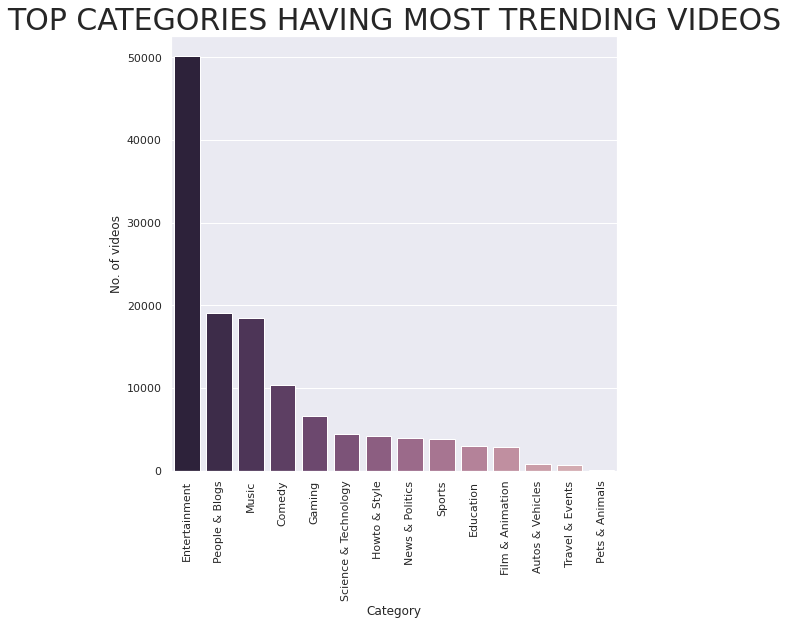

In [150]:
cdf = df_india["category_name"].value_counts().to_frame().reset_index()
cdf.rename(columns={"index": "category_name", "category_name": "No_of_videos"}, inplace=True)
fig, ax = plt.subplots(figsize=(8,8))
_ = sns.barplot(x="category_name", y="No_of_videos", data=cdf, 
                palette=sns.cubehelix_palette(n_colors=16, reverse=True), ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="No. of videos")
_ = plt.title('TOP CATEGORIES HAVING MOST TRENDING VIDEOS',fontsize=30)

## <a name="pub"></a>Trending videos and their publishing time
An example value of the `publish_time` column in our dataset is `2017-11-13T17:13:01.000Z`. And according to information on this page: https://www.w3.org/TR/NOTE-datetime, this means that the date of publishing the video is `2017-11-13` and the time is `17:13:01` in Coordinated Universal Time (UTC) time zone.

Let's add two columns to represent the date and hour of publishing each video, then delete the original `publish_time` column because we will not need it anymore

In [96]:
df_india["publishing_day"] = df_india["publishedAt"].apply(
    lambda x: datetime.datetime.strptime(x[:10], "%Y-%m-%d").date().strftime('%a'))
df_india["publishing_hour"] = df_india["publishedAt"].apply(lambda x: x[11:13]).astype('int')+5

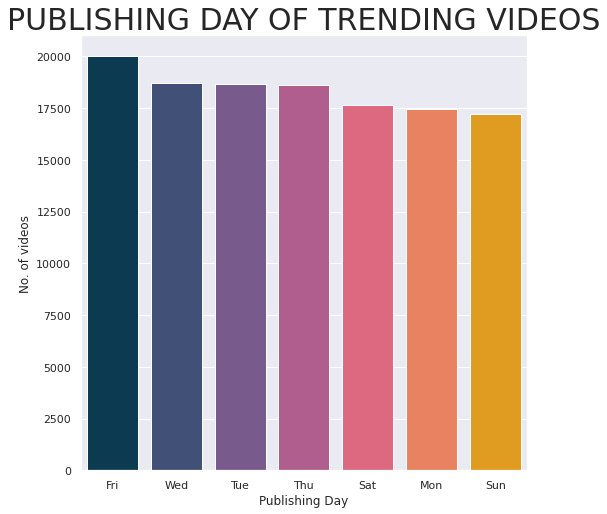

In [151]:
cdf = df_india["publishing_day"].value_counts()\
        .to_frame().reset_index().rename(columns={"index": "publishing_day", "publishing_day": "No_of_videos"})
fig, ax = plt.subplots(figsize=(8,8))
_ = sns.barplot(x="publishing_day", y="No_of_videos", data=cdf, 
                palette=sns.color_palette(['#003f5c', '#374c80', '#7a5195', 
                                           '#bc5090', '#ef5675', '#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Publishing Day", ylabel="No. of videos")
_ = plt.title('PUBLISHING DAY OF TRENDING VIDEOS',fontsize=30)

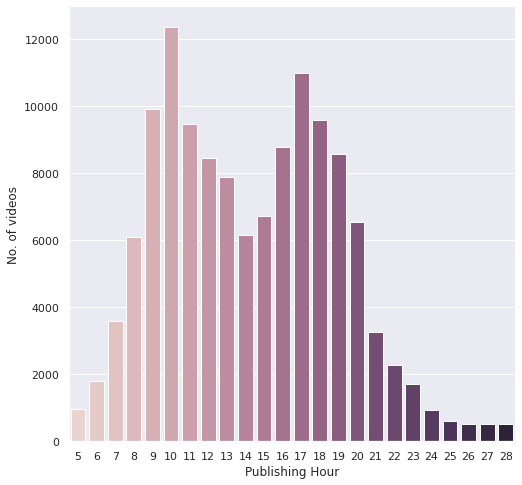

In [98]:
cdf = df_india["publishing_hour"].value_counts().to_frame().reset_index()\
        .rename(columns={"index": "publishing_hour", "publishing_hour": "No_of_videos"})
fig, ax = plt.subplots(figsize=(8,8))
_ = sns.barplot(x="publishing_hour", y="No_of_videos", data=cdf, 
                palette=sns.cubehelix_palette(n_colors=24), ax=ax)
_ = ax.set(xlabel="Publishing Hour", ylabel="No. of videos")
_ = plt.title('PUBLISHING TIME OF TRENDING VIDEOS',fontsize=30)

## <a name="commdis"></a>How many trending videos have their commets disabled?
To know that, we use `comments_disabled` column

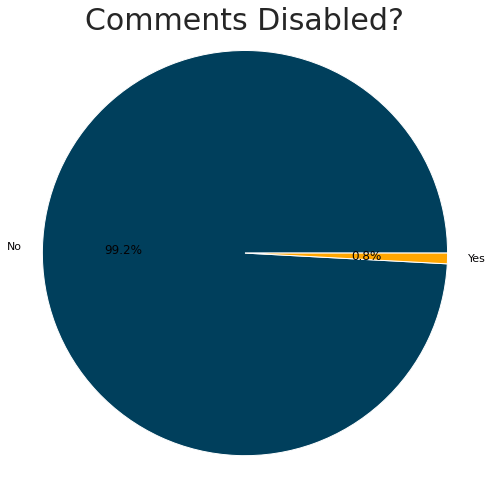

In [152]:
value_counts = df_india["comments_disabled"].value_counts().to_dict()
fig, ax = plt.subplots(figsize=(8,8))
_ = ax.pie(x=[value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'},autopct='%1.1f%%')
_ = ax.axis('equal')
_ = ax.set_title('Comments Disabled?',fontsize=30)

In [106]:
df_india["comments_disabled"].value_counts(normalize=True)*100

False   99.154
True     0.846
Name: comments_disabled, dtype: float64

## <a name="ratdis"></a>How many trending videos have their ratings disabled?
To know that, we use `ratings_disabled` column

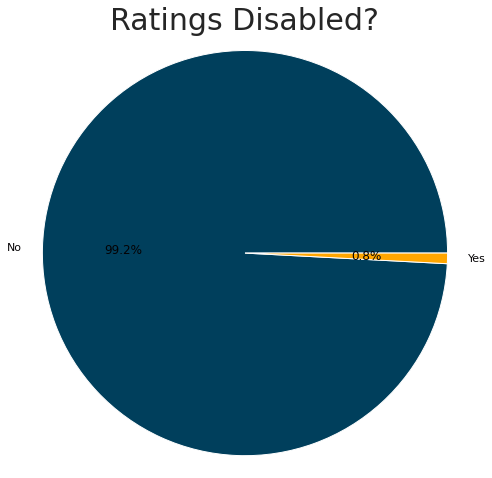

In [153]:
value_counts = df_india["ratings_disabled"].value_counts().to_dict()
fig, ax = plt.subplots(figsize=(8,8))
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
            colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'},autopct='%1.1f%%')
_ = ax.axis('equal')
_ = ax.set_title('Ratings Disabled?',fontsize=30)

<h1 style="font-family:COMIC SANS ;text-align:left;background-color:salmon"><b>📄 Machine Learning📄</b></h1>

## Predicting views of a video based on likes

In [112]:
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [116]:
X = np.array(df_india['likes']).reshape(-1, 1)
y = np.array(df_india['view_count']).reshape(-1, 1)

# Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40)
 



In [117]:
regr = LinearRegression()
 
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.675176888975868


In [119]:
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
 
# fit the regressor with x and y data
regressor.fit(X_train, y_train) 
print(regressor.score(X_test, y_test))

0.5479264431132447


In [123]:
from sklearn.preprocessing import StandardScaler
scale_X = StandardScaler()
scale_y = StandardScaler()

X = scale_X.fit_transform(X)
y = scale_y.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40)

In [124]:
from sklearn.svm import SVR

svr_regressor = SVR(kernel='rbf', gamma='auto')
svr_regressor.fit(X_train, y_train)

SVR(gamma='auto')

In [125]:
print(svr_regressor.score(X_train, y_train))

0.6366653403673754


In [128]:
models= ['Linear Regression','Random Forest Regressor','Support Vector Regressor']
accuracy_scores=[67.5,54.8,63.7]
df_accuracy  = pd.DataFrame()
df_accuracy["Model"] = models
df_accuracy["Accuracy %"] = accuracy_scores
df_accuracy

,Model,Accuracy %
0,Linear Regression,67.500
1,Random Forest Regressor,54.800
2,Support Vector Regressor,63.700


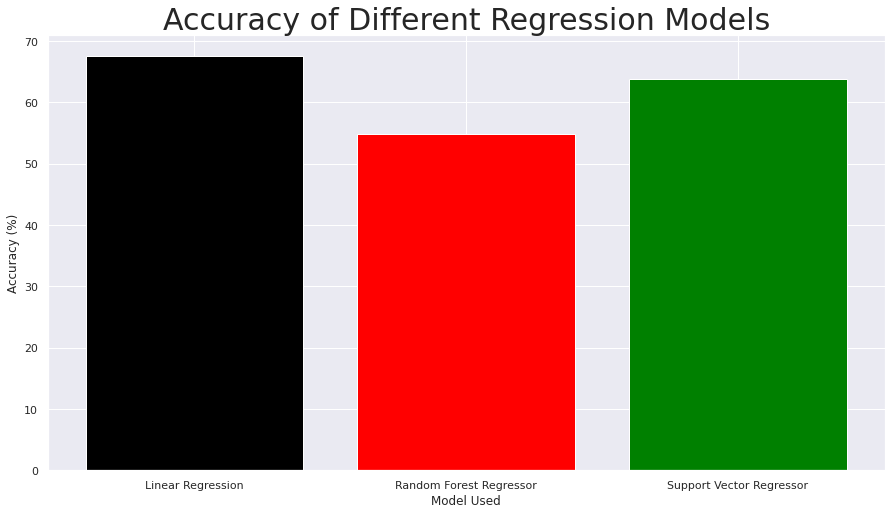

In [154]:
plt.bar(df_accuracy['Model'], df_accuracy['Accuracy %'],color=['black', 'red', 'green'])
plt.xlabel('Model Used')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Different Regression Models',fontsize=30)
plt.rcParams["figure.figsize"] = (15,8) 
plt.show()